**Tareas pendientes**
- Cambiar tamaño de los ejes, títulos, la paleta de colores de los gráficos
- En la matriz de correlación poner la variable categórica
- Preguntar sobre el score óptimo
- Preguntar sobre el sobremuestreo
- Preguntar sobre los valores aleatorios
- Preguntar sobre la curva roc

#**Conectarse a Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import matplotlib.colors
import matplotlib.patches as patches

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc,
                             ConfusionMatrixDisplay, f1_score, precision_recall_curve, recall_score, precision_score)
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

#**Base de datos**

##Lectura de base de datos

La columna **fetal_health** tiene como etiquetas 1-Normal, 2-Sospechoso y 3-Patológico.

In [3]:
# Lectura de la base de datos

base = pd.read_csv('/content/drive/MyDrive/Proyecto de Consultoria/fetal_health.csv')
print('La base de datos tiene', base.shape[0], 'filas y', base.shape[1], 'columnas')
base.reset_index()
base.head()

La base de datos tiene 2126 filas y 22 columnas


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# Nombre de las columnas

base.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
# Cambio de nombre a las columnas

base.columns = ['baseline_value', 'accelerations', 'fetal_movement',
                'uterine_contractions', 'light_decelerations', 'severe_decelerations',
                'prolongued_decelerations', 'abnormal_short_tv',
                'mean_value_of_short_tv',
                'percentage_of_time_waltv',
                'mean_value_of_long_tv', 'histogram_width',
                'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
                'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
                'histogram_median', 'histogram_variance', 'histogram_tendency',
                'fetal_health']

aux = base.copy()
base_MRD = base.copy()

In [6]:
# Conversión de la columna fetal_health a categoríca

base['fetal_health'] = base['fetal_health'].astype('category')

In [7]:
# Comprobar si hay valores nulos e información de las columnas

# Verifica si hay nulos en la base
#base.isnull().any()

# Suma la cantidad de nulos que hay en la base
base.isnull().sum()

baseline_value                0
accelerations                 0
fetal_movement                0
uterine_contractions          0
light_decelerations           0
severe_decelerations          0
prolongued_decelerations      0
abnormal_short_tv             0
mean_value_of_short_tv        0
percentage_of_time_waltv      0
mean_value_of_long_tv         0
histogram_width               0
histogram_min                 0
histogram_max                 0
histogram_number_of_peaks     0
histogram_number_of_zeroes    0
histogram_mode                0
histogram_mean                0
histogram_median              0
histogram_variance            0
histogram_tendency            0
fetal_health                  0
dtype: int64

In [8]:
# Información de la base

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   baseline_value              2126 non-null   float64 
 1   accelerations               2126 non-null   float64 
 2   fetal_movement              2126 non-null   float64 
 3   uterine_contractions        2126 non-null   float64 
 4   light_decelerations         2126 non-null   float64 
 5   severe_decelerations        2126 non-null   float64 
 6   prolongued_decelerations    2126 non-null   float64 
 7   abnormal_short_tv           2126 non-null   float64 
 8   mean_value_of_short_tv      2126 non-null   float64 
 9   percentage_of_time_waltv    2126 non-null   float64 
 10  mean_value_of_long_tv       2126 non-null   float64 
 11  histogram_width             2126 non-null   float64 
 12  histogram_min               2126 non-null   float64 
 13  histogram_max     

#Preprocesamiento

##Variables de baja varianza

In [9]:
# Varianza de cada una de las variables

round(np.var(base.iloc[:, :-1]), 2)

baseline_value                  96.80
accelerations                    0.00
fetal_movement                   0.00
uterine_contractions             0.00
light_decelerations              0.00
severe_decelerations             0.00
prolongued_decelerations         0.00
abnormal_short_tv              295.45
mean_value_of_short_tv           0.78
percentage_of_time_waltv       338.29
mean_value_of_long_tv           31.66
histogram_width               1516.83
histogram_min                  873.40
histogram_max                  321.84
histogram_number_of_peaks        8.69
histogram_number_of_zeroes       0.50
histogram_mode                 268.22
histogram_mean                 243.05
histogram_median               209.18
histogram_variance             839.31
histogram_tendency               0.37
dtype: float64

In [10]:
# Da como resultado aquellas variables que estan por debajo de 0.25 de varianza

varianza = VarianceThreshold(threshold = 1)
varianza.fit(base.iloc[:, :-1])
columnas = [i for i in base.iloc[:, :-1].columns if i not in base.iloc[:, :-1].columns[varianza.get_support()]]
columnas

['accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'mean_value_of_short_tv',
 'histogram_number_of_zeroes',
 'histogram_tendency']

In [11]:
# Nueva base de datos sin las variables con baja varianza

base = base.drop(columnas, axis = 1)
print('La base de datos tiene', base.shape[0], 'filas y', base.shape[1], 'columnas')

La base de datos tiene 2126 filas y 13 columnas


##Sobremuestreo

In [12]:
# Conteo de las clases antes del sobremuestreo

ContarA = Counter(base.iloc[:, -1])
print('Antes del sobremuestreo:', ContarA)

Antes del sobremuestreo: Counter({1.0: 1655, 2.0: 295, 3.0: 176})


In [13]:
# Realizar sobremuestreo con la técnica SMOTEENN

copia_base = base.copy()
filas = base.shape[0]
smoteenn = SMOTEENN(sampling_strategy = 'not majority')
base_smoteenn = smoteenn.fit_resample(copia_base.iloc[:, :-1], copia_base.iloc[:, -1])
                                                             
base_sobremuestreo = base_smoteenn[0]
base_sobremuestreo['fetal_health'] = base_smoteenn[1]
                                                             
print('Se agregarón', base_sobremuestreo.shape[0] - filas, 'filas con respecto a las clases minoritarias')

Se agregarón 2434 filas con respecto a las clases minoritarias


In [14]:
# Conteo de clases después del sobremuestreo

ContarD = Counter(base_sobremuestreo.iloc[:, -1])
print('Después del sobremuestreo:', ContarD)

Después del sobremuestreo: Counter({3.0: 1610, 2.0: 1546, 1.0: 1404})


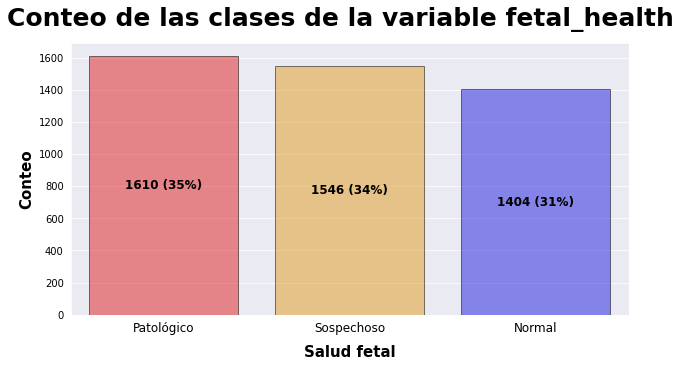

In [15]:
# Realiza un gráfico de conteo de las clases de la variable fetal_health

sns.set_style('darkgrid')
sns.color_palette('husl', 9)

plt.figure(figsize = (10, 5))
colores = {1: 'blue', 2: 'orange', 3: 'red'}

a = sns.countplot(x = base_sobremuestreo['fetal_health'],
                  order = base_sobremuestreo['fetal_health'].value_counts(ascending = False).index, edgecolor = 'black',
                  palette = colores, alpha = 0.5)
valores_absolutos = base_sobremuestreo['fetal_health'].value_counts(ascending = False)
valores_relativos = base_sobremuestreo['fetal_health'].value_counts(ascending = False, normalize = True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(valores_absolutos, valores_relativos)]

a.bar_label(container = a.containers[0], labels = lbls, fontweight = 'bold',
            label_type = 'center',
            #padding = 10,
            color = 'black',
            fontsize = 12)
a.set_xticklabels(['Patológico', 'Sospechoso', 'Normal'])

plt.suptitle('Conteo de las clases de la variable fetal_health', fontweight = 'bold', fontsize = 25, color = 'black')
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black')
plt.xlabel('Salud fetal', fontweight = 'bold', fontsize = 15, color = 'black', labelpad = 10)
plt.ylabel('Conteo', fontweight = 'bold', fontsize = 15, color = 'black')
plt.subplots_adjust(top = 0.88)

##Selección de variables más importantes

###Base de datos desequilibrada

Text(0, 0.5, 'Variables')

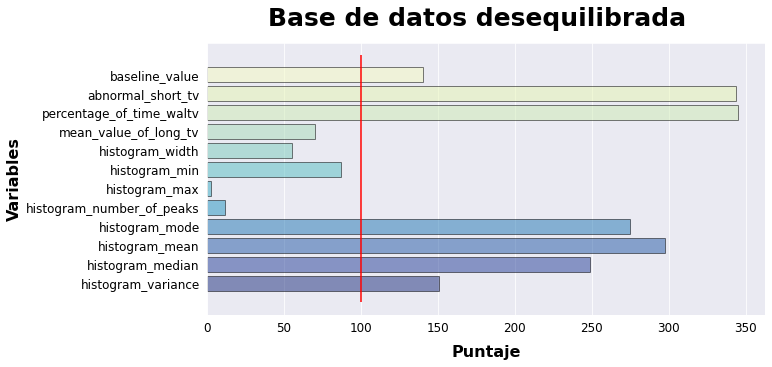

In [16]:
# Realiza la selección de variables de la base desequilibrada
#https://enjoymachinelearning.com/blog/feature-selection-selectkbest-sklearn/

x = base.iloc[:, :-1] 
y = base.iloc[:, -1]

seleccion = SelectKBest(f_classif, k = 'all')
seleccion.fit(x,y)

puntajes = pd.DataFrame(seleccion.scores_)
columnas = pd.DataFrame(x.columns)
variables_puntaje = pd.concat([columnas, puntajes], axis = 1)
variables_puntaje.columns = ['Variables', 'Puntaje'] 

plt.subplots(figsize = (10, 5))
sns.barplot(data = variables_puntaje, x = 'Puntaje', y = 'Variables', edgecolor = 'black',
            saturation = 1, orient = 'h', alpha = 0.5, palette = 'YlGnBu')
plt.vlines(x = 100, ymin = -1, ymax = 12, color = 'red')
plt.suptitle('Base de datos desequilibrada', fontweight = 'bold', fontsize = 25, color = 'black')
plt.subplots_adjust(top = 0.88)
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black', fontsize = 12)
plt.xlabel('Puntaje', fontweight = 'bold', fontsize = 16, color = 'black', labelpad = 10)
plt.ylabel('Variables', fontweight = 'bold', fontsize = 16, color = 'black')


In [17]:
# Crea la nueva base de datos con las variables seleccionadas de la base desequilibrada

seleccionarva = variables_puntaje[variables_puntaje['Puntaje'] >= 100] 
seleccionarva = list(seleccionarva['Variables']) 
seleccionarva.append('fetal_health') 

base_nueva = base[seleccionarva]

print('La base de datos desequilibrada nueva tiene', base_nueva.shape[0], 'filas y', base_nueva.shape[1], 'columnas')

La base de datos desequilibrada nueva tiene 2126 filas y 8 columnas


###Base de datos equilibrada

Text(0, 0.5, 'Variables')

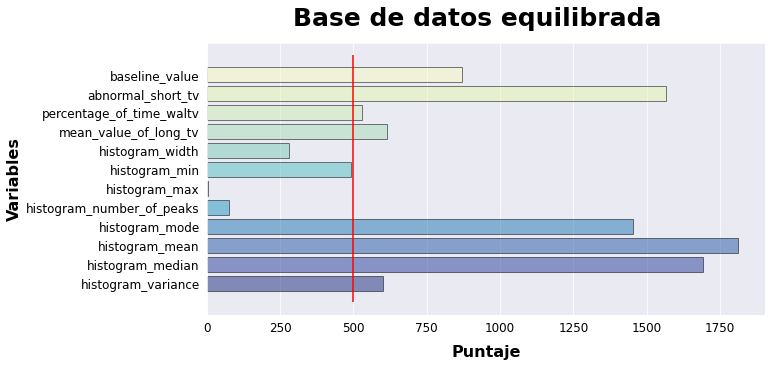

In [18]:
# Realiza la selección de variables de la base equilibrada

x = base_sobremuestreo.iloc[:, :-1] 
y = base_sobremuestreo.iloc[:, -1]

seleccion = SelectKBest(f_classif, k = 'all')
seleccion.fit(x,y)

puntajes = pd.DataFrame(seleccion.scores_)
columnas = pd.DataFrame(x.columns)
variables_puntaje = pd.concat([columnas, puntajes], axis = 1)
variables_puntaje.columns = ['Variables', 'Puntaje'] 

plt.subplots(figsize = (10, 5))
sns.barplot(data = variables_puntaje, x = 'Puntaje', y = 'Variables', edgecolor = 'black',
            saturation = 1, orient = 'h', alpha = 0.5, palette = 'YlGnBu')
plt.vlines(x = 500, ymin = -1, ymax = 12, color = 'red')
plt.suptitle('Base de datos equilibrada', fontweight = 'bold', fontsize = 25, color = 'black')
plt.subplots_adjust(top = 0.88)
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black', fontsize = 12)
plt.xlabel('Puntaje', fontweight = 'bold', fontsize = 16, color = 'black', labelpad = 10)
plt.ylabel('Variables', fontweight = 'bold', fontsize = 16, color = 'black')

In [19]:
# Crea la nueva base de datos con las variables seleccionadas de la base equilibrada

seleccionarva = variables_puntaje[variables_puntaje['Puntaje'] >= 500] 
seleccionarva = list(seleccionarva['Variables']) 
seleccionarva.append('fetal_health') 

base_nueva_sobremuestreo = base_sobremuestreo[seleccionarva]

print('La base de datos equilibrada nueva tiene', base_nueva_sobremuestreo.shape[0], 'filas y',
      base_nueva_sobremuestreo.shape[1], 'columnas')

La base de datos equilibrada nueva tiene 4560 filas y 9 columnas


#Aprendizaje Supervisado

##Base de datos desequilibrada

###División del conjunto de entrenamiento y prueba

In [20]:
# Separa la base desequilibrada en entrenamiento y prueba

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(base_nueva.iloc[:, :-1], base_nueva.iloc[:, -1],
                                                            test_size = 0.3, shuffle = True)
print('La base de datos desequilibrada de entrenamiento tiene', x_entrena.shape[0], 'filas y', x_entrena.shape[1], 'columnas')
print('La base de datos desequilibrada de prueba tiene', x_prueba.shape[0], 'filas y', x_prueba.shape[1], 'columnas')

La base de datos desequilibrada de entrenamiento tiene 1488 filas y 7 columnas
La base de datos desequilibrada de prueba tiene 638 filas y 7 columnas


###Estandarización de los conjuntos de datos

In [21]:
# Estandariza la base desequilibrada

estandarizar = StandardScaler()
x_entrena = estandarizar.fit_transform(x_entrena) 
x_prueba = estandarizar.transform(x_prueba)

###Modelo Regresión Logística

###Entrenamiento, prueba del modelo y reporte de resultados

In [22]:
# Función para crear una matriz de confusión

#colores = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#008B8B', '#E0FFFF', '#FFFFFF'])
#YlGnBu

etiquetas = ['Normal', 'Sospechoso', 'Patológico']

def matriz_confusion(y_prueba, y_predicha):
  conf_mat = confusion_matrix(y_prueba, y_predicha)
  fig, ax = plt.subplots(figsize = (8,6))
  sns.heatmap(conf_mat, annot = True, fmt = 'd',
              xticklabels = etiquetas,
              yticklabels = etiquetas, cmap = 'Blues',
              linecolor = 'black')
  plt.title('Matriz de Confusión', fontweight = 'bold')
  plt.xlabel('Valores predichos', fontweight = 'bold')
  plt.ylabel('Valores reales', fontweight = 'bold')
  plt.show()

Exactitud en la base de datos desequilibrada: 87.7698%
              precision    recall  f1-score   support

      Normal       0.91      0.96      0.94       490
  Sospechoso       0.68      0.58      0.62        90
  Patológico       0.82      0.64      0.72        58

    accuracy                           0.88       638
   macro avg       0.80      0.73      0.76       638
weighted avg       0.87      0.88      0.87       638



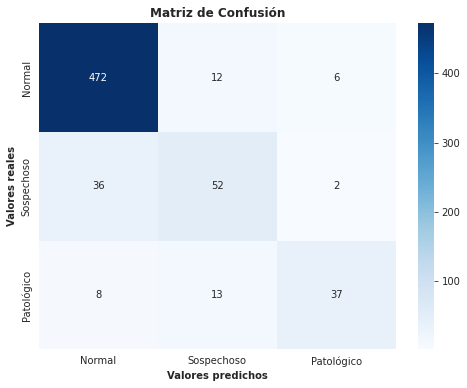

In [23]:
# Evalua el modelo KNN con parámetros predeterminados

lore = LogisticRegression()
lore.fit(x_entrena, y_entrena)
y_predicha = lore.predict(x_prueba)
print('Exactitud en la base de datos desequilibrada:', str(round((cross_val_score(lore, x_entrena, y_entrena, cv = 10)).mean()*100, 4)) + '%')
print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
matriz_confusion(y_prueba, y_predicha)

###Hiperparámetros: Entrenamiento, prueba del modelo y reporte de resultados

In [24]:
# Selección de los hiperparámetros de manera aleatoria

#https://jdvelasq.github.io/courses/notebooks/sklearn_model_selection_and_evaluation/1-09_RandomizedSearchCV.html
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

#scipy.stats.uniform(scale = 1).rvs(size = 1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=10)
#solo 2 dimensiones 'haversine'

parametros = {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000),
        'max_iter': list(np.arange(100, 1001, 1)),
        'warm_start': [True, False],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [25]:
# Entrenamiento del modelo

hiperparametros = RandomizedSearchCV(estimator = LogisticRegression(),
                                     param_distributions = parametros,
                                     n_iter = 10,
                                     cv = 10,
                                     scoring= 'accuracy',
                                     refit = True,
                                     #n_jobs = -1,
                                     return_train_score = True,
                                     verbose = 3)

start = time()
hiperparametros.fit(x_entrena, y_entrena)
print('\n')
print('Le tomó %.2f segundos para encontrar los parámetros'%(time() - start))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=96.51900801946503, max_iter=404, penalty=None, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END C=96.51900801946503, max_iter=404, penalty=None, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10] END C=96.51900801946503, max_iter=404, penalty=None, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10] END C=96.51900801946503, max_iter=404, penalty=None, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10] END C=96.51900801946503, max_iter=404, penalty=None, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10] END C=96.51900801946503, max_iter=404, penalty=None, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10] END C=96.51900801946503, max_iter=404, penalty=None, solver=lbfgs, warm_sta

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 441, in _check_solver
    raise ValueError(
ValueError: Logisti

In [26]:
# Resultados del entrenamiento

print('Los mejores parámetros para la base de datos desequilibrada:', hiperparametros.best_params_)
print('\n')
print('Índice que le corresponde:', hiperparametros.best_index_)
print('\n')
print('Mejor estimador:', hiperparametros.best_estimator_)
print('\n')
print('Mejor exactitud:', str(round(hiperparametros.best_score_*100, 4)) + '%')

Los mejores parámetros para la base de datos desequilibrada: {'warm_start': True, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 561, 'C': 93.73118879488295}


Índice que le corresponde: 1


Mejor estimador: LogisticRegression(C=93.73118879488295, max_iter=561, warm_start=True)


Mejor exactitud: 87.9707%


              precision    recall  f1-score   support

      Normal       0.92      0.96      0.94       490
  Sospechoso       0.67      0.57      0.61        90
  Patológico       0.81      0.66      0.72        58

    accuracy                           0.88       638
   macro avg       0.80      0.73      0.76       638
weighted avg       0.87      0.88      0.87       638



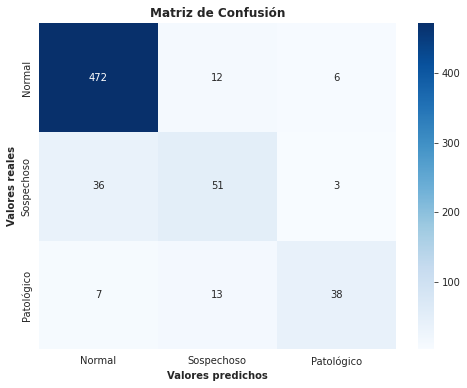

In [27]:
# Evaluación del modelo

y_predicha = hiperparametros.predict(x_prueba)
print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
matriz_confusion(y_prueba, y_predicha)

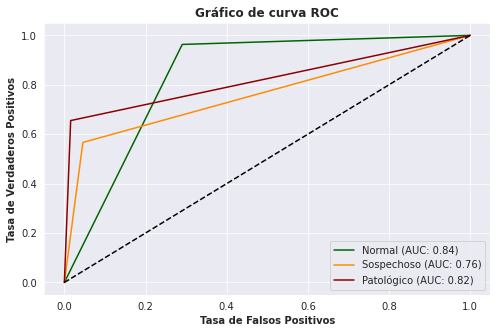

Área bajo la curva: 90.9483%



In [28]:
# Curva ROC AUC

etiquetas_clases= ['Normal', 'Sospechoso', 'Patológico']
colores = ['darkgreen', 'darkorange', 'darkred']

# Función para calcular el ROC AUC multiclase (con gráfico)
def multiclass_roc_auc_score(y_prueba, y_predicha, average = 'micro'):
    lb = LabelBinarizer()
    lb.fit(y_prueba)
    y_prueba = lb.transform(y_prueba)
    y_predicha = lb.transform(y_predicha)

    plt.subplots(1,1, figsize = (8, 5))
    for (idx, c_label) in enumerate(etiquetas_clases):
        fpr, tpr, thresholds = roc_curve(y_prueba[:, idx].astype(int), y_predicha[:,idx])
        plt.plot(fpr, tpr, label = '%s (AUC: %0.2f)' % (c_label, auc(fpr, tpr)), color = colores[idx])
    plt.plot(fpr, fpr, linestyle = '--', color = 'black')
    plt.legend()
    plt.title('Gráfico de curva ROC', fontweight = 'bold')
    plt.xlabel('Tasa de Falsos Positivos', fontweight = 'bold')
    plt.ylabel('Tasa de Verdaderos Positivos', fontweight = 'bold')
    plt.show()
    return roc_auc_score(y_prueba, y_predicha, average = average)

print(f"Área bajo la curva: {multiclass_roc_auc_score(y_prueba, y_predicha)*100:.4f}%\n")



In [29]:
# Tabla de resultados de hiperparámetros

tabla = pd.DataFrame(hiperparametros.cv_results_).head(3)
tabla

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_solver,param_penalty,param_max_iter,param_C,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002974,0.003107,0.000000,0.000000,True,lbfgs,None,404,96.519008,"{'warm_start': True, 'solver': 'lbfgs', 'penal...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.247393,0.061816,0.005437,0.004416,True,lbfgs,l2,561,93.731189,"{'warm_start': True, 'solver': 'lbfgs', 'penal...",...,0.884242,0.882001,0.882748,0.880508,0.883495,0.876027,0.882836,0.877612,0.881198,0.002457
2,0.042726,0.020284,0.004872,0.005011,False,liblinear,l2,867,4.136045,"{'warm_start': False, 'solver': 'liblinear', '...",...,0.873040,0.872293,0.873040,0.873786,0.877521,0.870799,0.877612,0.875373,0.873880,0.002438


##Base de datos equilibrada

###División del conjunto de entrenamiento y prueba

In [30]:
# Separa la base desequilibrada en entrenamiento y prueba

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(base_nueva_sobremuestreo.iloc[:, :-1], base_nueva_sobremuestreo.iloc[:, -1],
                                                            test_size = 0.3, shuffle = True)
print('La base de datos desequilibrada de entrenamiento tiene', x_entrena.shape[0], 'filas y', x_entrena.shape[1], 'columnas')
print('La base de datos desequilibrada de prueba tiene', x_prueba.shape[0], 'filas y', x_prueba.shape[1], 'columnas')

La base de datos desequilibrada de entrenamiento tiene 3192 filas y 8 columnas
La base de datos desequilibrada de prueba tiene 1368 filas y 8 columnas


###Estandarización de los conjuntos de datos

In [31]:
# Estandariza la base desequilibrada

estandarizar = StandardScaler()
x_entrena = estandarizar.fit_transform(x_entrena) 
x_prueba = estandarizar.transform(x_prueba)

###Modelo Regresión Logística

###Entrenamiento, prueba del modelo y reporte de resultados

In [32]:
# Función para crear una matriz de confusión

#colores = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#008B8B', '#E0FFFF', '#FFFFFF'])
#YlGnBu

etiquetas = ['Normal', 'Sospechoso', 'Patológico']

def matriz_confusion(y_prueba, y_predicha):
  conf_mat = confusion_matrix(y_prueba, y_predicha)
  fig, ax = plt.subplots(figsize = (8,6))
  sns.heatmap(conf_mat, annot = True, fmt = 'd',
              xticklabels = etiquetas,
              yticklabels = etiquetas, cmap = 'Blues',
              linecolor = 'black')
  plt.title('Matriz de Confusión', fontweight = 'bold')
  plt.xlabel('Valores predichos', fontweight = 'bold')
  plt.ylabel('Valores reales', fontweight = 'bold')
  plt.show()

Exactitud en la base de datos desequilibrada: 85.2134%
              precision    recall  f1-score   support

      Normal       0.91      0.89      0.90       442
  Sospechoso       0.80      0.81      0.81       469
  Patológico       0.86      0.87      0.86       457

    accuracy                           0.86      1368
   macro avg       0.86      0.86      0.86      1368
weighted avg       0.86      0.86      0.86      1368



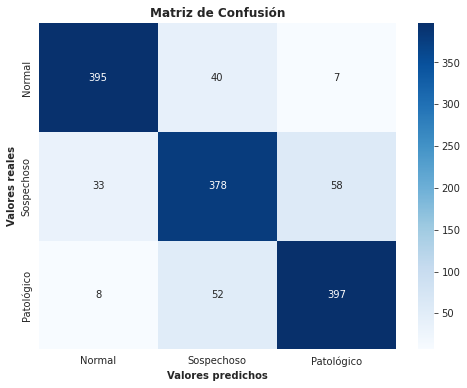

In [33]:
# Evalua el modelo KNN con parámetros predeterminados

lore = LogisticRegression()
lore.fit(x_entrena, y_entrena)
y_predicha = lore.predict(x_prueba)
print('Exactitud en la base de datos desequilibrada:', str(round((cross_val_score(lore, x_entrena, y_entrena, cv = 10)).mean()*100, 4)) + '%')
print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
matriz_confusion(y_prueba, y_predicha)

###Hiperparámetros: Entrenamiento, prueba del modelo y reporte de resultados

In [34]:
# Selección de los hiperparámetros de manera aleatoria

#https://jdvelasq.github.io/courses/notebooks/sklearn_model_selection_and_evaluation/1-09_RandomizedSearchCV.html
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

#scipy.stats.uniform(scale = 1).rvs(size = 1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=10)
#solo 2 dimensiones 'haversine'

parametros = {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000),
        'max_iter': list(np.arange(100, 1001, 1)),
        'warm_start': [True, False],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [35]:
# Entrenamiento del modelo

hiperparametros = RandomizedSearchCV(estimator = LogisticRegression(),
                                     param_distributions = parametros,
                                     n_iter = 10,
                                     cv = 10,
                                     scoring= 'accuracy',
                                     refit = True,
                                     #n_jobs = -1,
                                     return_train_score = True,
                                     verbose = 3)

start = time()
hiperparametros.fit(x_entrena, y_entrena)
print('\n')
print('Le tomó %.2f segundos para encontrar los parámetros'%(time() - start))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=53.85813315397233, max_iter=292, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.855, test=0.850) total time=   0.2s
[CV 2/10] END C=53.85813315397233, max_iter=292, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.855, test=0.841) total time=   0.2s
[CV 3/10] END C=53.85813315397233, max_iter=292, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.858, test=0.853) total time=   0.3s
[CV 4/10] END C=53.85813315397233, max_iter=292, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.857, test=0.853) total time=   0.2s
[CV 5/10] END C=53.85813315397233, max_iter=292, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.863, test=0.834) total time=   0.4s
[CV 6/10] END C=53.85813315397233, max_iter=292, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.855, test=0.862) total time=   0.3s
[CV 7/10] END C=53.85813315397233, max_iter=292, 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError(
ValueError: Logisti



Le tomó 10.91 segundos para encontrar los parámetros


In [36]:
# Resultados del entrenamiento

print('Los mejores parámetros para la base de datos desequilibrada:', hiperparametros.best_params_)
print('\n')
print('Índice que le corresponde:', hiperparametros.best_index_)
print('\n')
print('Mejor estimador:', hiperparametros.best_estimator_)
print('\n')
print('Mejor exactitud:', str(round(hiperparametros.best_score_*100, 4)) + '%')

Los mejores parámetros para la base de datos desequilibrada: {'warm_start': True, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 292, 'C': 53.85813315397233}


Índice que le corresponde: 0


Mejor estimador: LogisticRegression(C=53.85813315397233, max_iter=292, solver='newton-cg',
                   warm_start=True)


Mejor exactitud: 85.1194%


              precision    recall  f1-score   support

      Normal       0.90      0.89      0.90       442
  Sospechoso       0.81      0.82      0.81       469
  Patológico       0.87      0.87      0.87       457

    accuracy                           0.86      1368
   macro avg       0.86      0.86      0.86      1368
weighted avg       0.86      0.86      0.86      1368



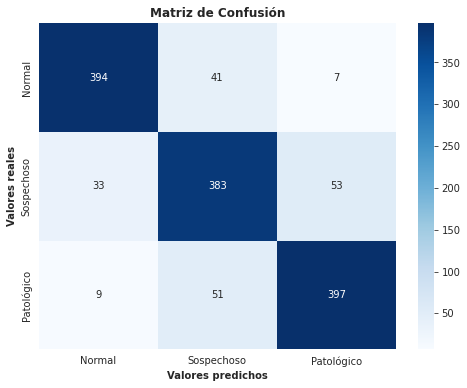

In [37]:
# Evaluación del modelo

y_predicha = hiperparametros.predict(x_prueba)
print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
matriz_confusion(y_prueba, y_predicha)

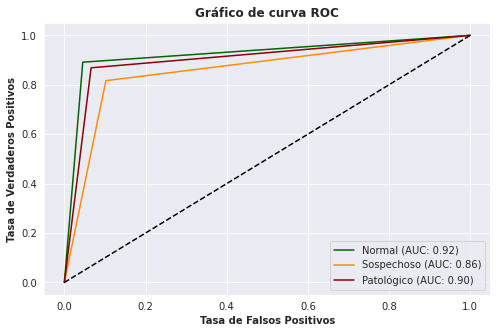

Área bajo la curva: 89.3640%



In [38]:
# Curva ROC AUC
etiquetas_clases= ['Normal', 'Sospechoso', 'Patológico']
colores = ['darkgreen', 'darkorange', 'darkred']

# Función para calcular el ROC AUC multiclase (con gráfico)
def multiclass_roc_auc_score(y_prueba, y_predicha, average = 'micro'):
    lb = LabelBinarizer()
    lb.fit(y_prueba)
    y_prueba = lb.transform(y_prueba)
    y_predicha = lb.transform(y_predicha)

    plt.subplots(1,1, figsize = (8, 5))
    for (idx, c_label) in enumerate(etiquetas_clases):
        fpr, tpr, thresholds = roc_curve(y_prueba[:, idx].astype(int), y_predicha[:,idx])
        plt.plot(fpr, tpr, label = '%s (AUC: %0.2f)' % (c_label, auc(fpr, tpr)), color = colores[idx])
    plt.plot(fpr, fpr, linestyle = '--', color = 'black')
    plt.legend()
    plt.title('Gráfico de curva ROC', fontweight = 'bold')
    plt.xlabel('Tasa de Falsos Positivos', fontweight = 'bold')
    plt.ylabel('Tasa de Verdaderos Positivos', fontweight = 'bold')
    plt.show()
    return roc_auc_score(y_prueba, y_predicha, average = average)

print(f"Área bajo la curva: {multiclass_roc_auc_score(y_prueba, y_predicha)*100:.4f}%\n")



In [39]:
# Tabla de resultados de hiperparámetros

tabla = pd.DataFrame(hiperparametros.cv_results_).head(3)
tabla

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_solver,param_penalty,param_max_iter,param_C,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.339700,0.093388,0.001545,0.000142,True,newton-cg,l2,292,53.858133,"{'warm_start': True, 'solver': 'newton-cg', 'p...",...,0.858336,0.857292,0.862861,0.854856,0.853463,0.85764,0.857988,0.8559,0.856829,0.002527
1,0.002796,0.002537,0.000000,0.000000,False,newton-cholesky,l2,440,17.780625,"{'warm_start': False, 'solver': 'newton-choles...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.002151,0.002576,0.000000,0.000000,False,newton-cholesky,l1,495,87.933276,"{'warm_start': False, 'solver': 'newton-choles...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
